# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly import graph_objects
from plotly.graph_objs import Layout

In [53]:
dados = pd.read_csv(r'../dados.csv' , header=[0, 1], index_col=0)


#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [114]:
dados_mean_vert = dados['Adj Close'].rolling(90).mean().stack().reset_index()
dados_mean_vert.columns = ['data' , 'ativo' , 'Adj Close médio']
dados_mean_vert

,data,ativo,Adj Close médio
0,2022-05-11 00:00:00+00:00,AMD,111.667333
1,2022-05-11 00:00:00+00:00,INTC,45.265180
2,2022-05-11 00:00:00+00:00,NVDA,23.767817
3,2022-05-12 00:00:00+00:00,AMD,110.965333
4,2022-05-12 00:00:00+00:00,INTC,45.165194
...,...,...,...
1780,2024-09-20 00:00:00+00:00,INTC,27.040894
1781,2024-09-20 00:00:00+00:00,NVDA,116.840037
1782,2024-09-23 00:00:00+00:00,AMD,154.972111
1783,2024-09-23 00:00:00+00:00,INTC,26.948735


In [115]:
dados_std_vert = dados['Adj Close'].rolling(90).std().stack().reset_index()
dados_std_vert.columns = ['data' , 'ativo' , 'Adj Close STD']
dados_std_vert

,data,ativo,Adj Close STD
0,2022-05-11 00:00:00+00:00,AMD,15.067201
1,2022-05-11 00:00:00+00:00,INTC,2.786573
2,2022-05-11 00:00:00+00:00,NVDA,3.036349
3,2022-05-12 00:00:00+00:00,AMD,14.717622
4,2022-05-12 00:00:00+00:00,INTC,2.799751
...,...,...,...
1780,2024-09-20 00:00:00+00:00,INTC,5.591970
1781,2024-09-20 00:00:00+00:00,NVDA,10.860629
1782,2024-09-23 00:00:00+00:00,AMD,12.861908
1783,2024-09-23 00:00:00+00:00,INTC,5.596762


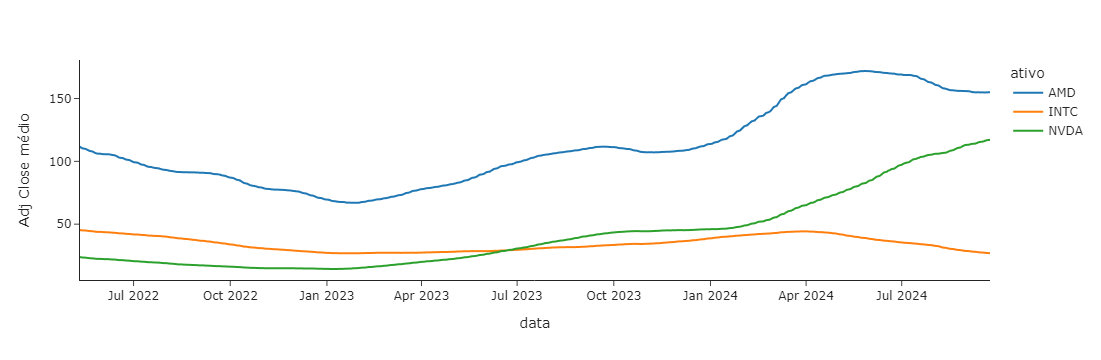

In [151]:
fig = px.line(dados_mean_vert , x = 'data' , y = 'Adj Close médio' , color = 'ativo' , template = 'simple_white')
fig.show()

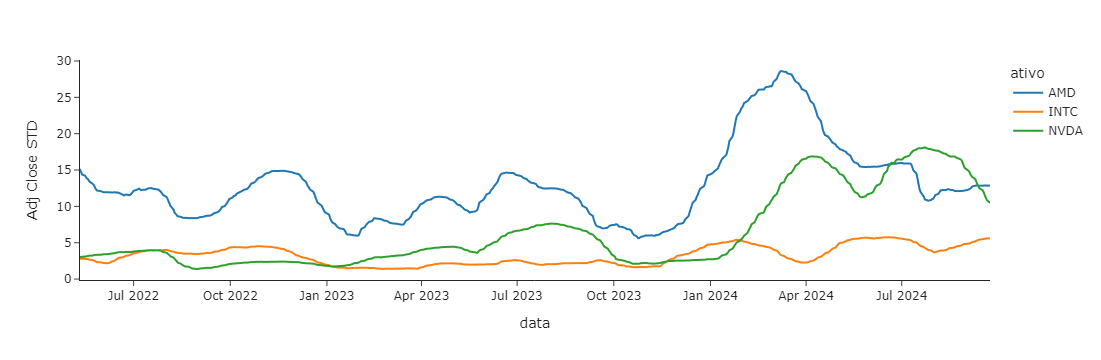

In [152]:
fig = px.line(dados_std_vert , x = 'data' , y = 'Adj Close STD' , color = 'ativo' , template = 'simple_white')
fig.show()

Sim, os gráficos apontam semelhanças nos periódos de maior volatilidade

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [118]:
lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['AMD']*len(lista_indicadores)

In [120]:
colunas = list(zip(lista_indicadores, ativo))

In [156]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 2022-01-03 00:00:00+00:00 to 2024-09-23 00:00:00+00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMD)   684 non-null    float64
 1   (Adj Close, INTC)  684 non-null    float64
 2   (Adj Close, NVDA)  684 non-null    float64
 3   (Close, AMD)       684 non-null    float64
 4   (Close, INTC)      684 non-null    float64
 5   (Close, NVDA)      684 non-null    float64
 6   (High, AMD)        684 non-null    float64
 7   (High, INTC)       684 non-null    float64
 8   (High, NVDA)       684 non-null    float64
 9   (Low, AMD)         684 non-null    float64
 10  (Low, INTC)        684 non-null    float64
 11  (Low, NVDA)        684 non-null    float64
 12  (Open, AMD)        684 non-null    float64
 13  (Open, INTC)       684 non-null    float64
 14  (Open, NVDA)       684 non-null    float64
 15  (Volume, AMD)      684 non-null  

In [165]:
AMD = AMD = dados.loc['2024-07-20 00:00:00+00:00':, colunas]
AMD.columns = lista_indicadores

In [166]:
graph = {
    'x': AMD.index,
    'open': AMD.Open,
    'close': AMD.Close,
    'high': AMD.High,
    'low': AMD.Low,
    'type': 'candlestick',
    'name': 'AMD',
    'showlegend': True
}

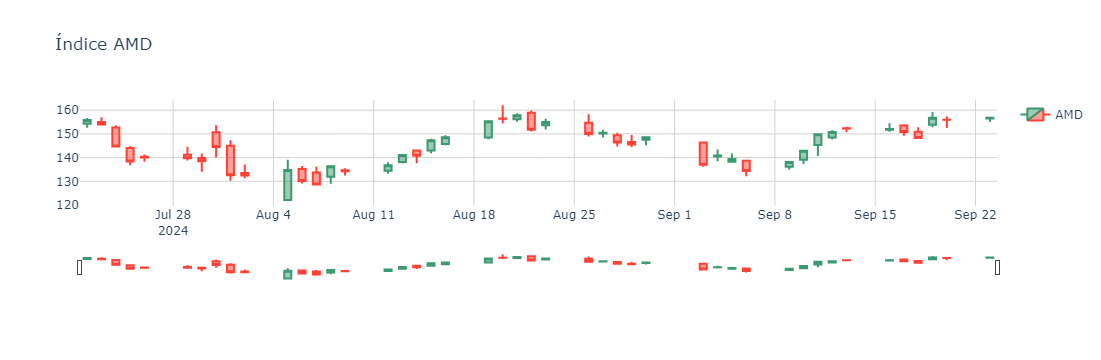

In [167]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Índice AMD",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico